In [1]:
%matplotlib inline

In [2]:
# The idea here is to reproduce the plots of the GC2 
# coordinates (T and U) for some of the examples in:
#   Spudich, Paul and Chiou, Brian, 2015, Strike-parallel 
#   and strike-normal coordinate system around geometrically 
#   complicated rupture traces—Use by NGA-West2 and further 
#   improvements: U.S. Geological Survey Open-File Report 
#   2015-1028, 20 p., http://dx.doi.org/10.3133/ofr20151028.

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import openquake.hazardlib.geo as geo

from shakelib.rupture.quad_rupture import QuadRupture
from  shakelib.distance import get_distance
from shakelib.rupture.origin import Origin

/Users/emthompson/miniconda/envs/shakemap/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Read in the Chi Chi fault data: 
f = 'data/0137A.POL'
i0 = np.arange(0, 9*11*3, 11)
i1 = i0 + 10
cs = list(zip(i0, i1))
df = pd.read_fwf(f, cs, skiprows = 2, nrows = 5, header = None)
mat = df.as_matrix()
ix = np.arange(0, 9*3, 3)
iy = ix + 1
iz = ix + 2
x0 = mat[0, ix]
x1 = mat[1, ix]
x2 = mat[2, ix]
x3 = mat[3, ix]
y0 = mat[0, iy]
y1 = mat[1, iy]
y2 = mat[2, iy]
y3 = mat[3, iy]
# Depth, positive down
z0 = np.abs(mat[0, iz])
z1 = np.abs(mat[1, iz])
z2 = np.abs(mat[2, iz])
z3 = np.abs(mat[3, iz])
epilat = 23.87
epilon = 120.75
proj = geo.utils.get_orthographic_projection(epilon-1, epilon+1, epilat+1, epilat-1)
lon0,lat0 = proj(x0, y0, reverse = True)
lon1,lat1 = proj(x1, y1, reverse = True)
lon2,lat2 = proj(x2, y2, reverse = True)
lon3,lat3 = proj(x3, y3, reverse = True)
# Make an Origin object; most of the 'event' values don't matter
event = {'lat': 0,  'lon': 0, 'depth':0, 'mag': 7.6, 
         'id':'', 'locstring':'', 'type':'ALL', 'eventsourcecode': ''}
origin = Origin(event)
rup = QuadRupture.fromVertices(
    lon0, lat0, z0, lon1, lat1, z1, lon2, lat2, z2, lon3, lat3, z3,
    origin,
    group_index = [0]*len(lon0))

In [4]:
# Grid of sites
buf = 0.5
lat = np.linspace(np.nanmin(rup._lat)-buf, np.nanmax(rup._lat)+buf, 350)
lon = np.linspace(np.nanmin(rup._lon)-buf, np.nanmax(rup._lon)+buf, 350)
lons, lats = np.meshgrid(lon, lat)
dep = np.zeros_like(lons)
x,y = proj(lon, lat)
rupx,rupy = proj(rup.lons, rup.lats)

/Users/emthompson/miniconda/envs/shakemap/lib/python3.5/site-packages/openquake/hazardlib/geo/utils.py:221: RuntimeWarning: invalid value encountered in greater
  if (sin_dist > self.sin_pi_over_4).any():


In [5]:
# Calculate U and T
dtypes = ['U', 'T']
dists = get_distance(dtypes, lats, lons, dep, rup)

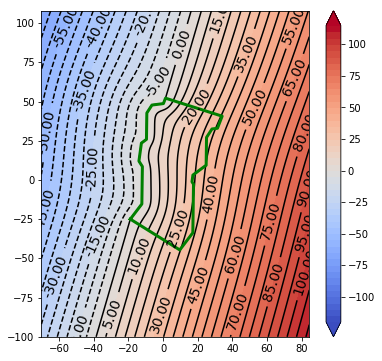

In [6]:
# Figure 6B
fig = plt.figure(figsize=(6,6))
CS = plt.contourf(x, y, dists['T'], 
                  cmap = plt.cm.coolwarm,
                  levels = np.arange(-120, 120, 5),
                  extend = "both")
CS2 = plt.contour(CS, colors = 'k')
plt.clabel(CS2, fmt='%2.2f', colors='k', fontsize=14)
plt.plot(rupx, rupy, color = 'g', linewidth = 3)
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(y), np.max(y)])
cbar = plt.colorbar(CS)

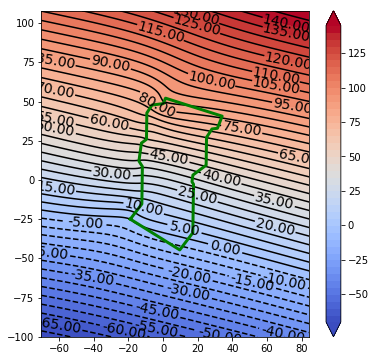

In [7]:
# Figure 6D
fig = plt.figure(figsize=(6,6))
CS = plt.contourf(x, y, dists['U'], 
                  cmap = plt.cm.coolwarm,
                  levels = np.arange(-70, 150, 5),
                  extend = "both")
CS2 = plt.contour(CS, colors = 'k')
plt.clabel(CS2, fmt='%2.2f', colors='k', fontsize=14)
plt.plot(rupx, rupy, color = 'g', linewidth = 3)
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(y), np.max(y)])
cbar = plt.colorbar(CS)

In [8]:
# San Fernando
x0 = np.array([7.1845, 7.8693])
y0 = np.array([-10.3793, -16.2096])
z0 = np.array([3.0000, 0.0000])
x1 = np.array([-7.8506, -7.5856])
y1 = np.array([-4.9073, -12.0682])
z1 = np.array([3.0000, 0.0000])
x2 = np.array([-4.6129, -5.5149])
y2 = np.array([3.9887, -4.3408])
z2 = np.array([16.0300, 8.0000])
x3 = np.array([10.4222, 9.9400])
y3 = np.array([-1.4833, -8.4823])
z3 = np.array([16.0300, 8.0000])

epilat = 34.44000
epilon = -118.41000
proj = geo.utils.get_orthographic_projection(epilon-1, epilon+1, epilat+1, epilat-1)
lon0,lat0 = proj(x0, y0, reverse = True)
lon1,lat1 = proj(x1, y1, reverse = True)
lon2,lat2 = proj(x2, y2, reverse = True)
lon3,lat3 = proj(x3, y3, reverse = True)

# Make an Origin object; most of the 'event' values don't matter
event = {'lat': 0,  'lon': 0, 'depth':0, 'mag': 6.61, 
         'id':'', 'locstring':'', 'type':'ALL', 'eventsourcecode': ''}
origin = Origin(event)
rup = QuadRupture.fromVertices(
    lon0, lat0, z0, lon1, lat1, z1, lon2, lat2, z2, lon3, lat3, z3,
    origin,
    group_index = [0, 1])

In [9]:
# Grid of sites
buf = 0.25
lat = np.linspace(np.nanmin(rup._lat)-buf, np.nanmax(rup._lat)+buf, 350)
lon = np.linspace(np.nanmin(rup._lon)-buf, np.nanmax(rup._lon)+buf, 350)
lons, lats = np.meshgrid(lon, lat)
dep = np.zeros_like(lons)
x,y = proj(lon, lat)
rupx,rupy = proj(rup.lons, rup.lats)

/Users/emthompson/miniconda/envs/shakemap/lib/python3.5/site-packages/openquake/hazardlib/geo/utils.py:221: RuntimeWarning: invalid value encountered in greater
  if (sin_dist > self.sin_pi_over_4).any():


In [10]:
# Calculate U and T
dtypes = ['U', 'T']
dists = get_distance(dtypes, lats, lons, dep, rup)

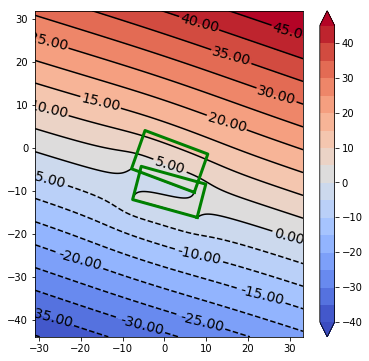

In [11]:
# Figure 9A
fig = plt.figure(figsize=(6,6))
CS = plt.contourf(x, y, dists['T'], 
                  cmap = plt.cm.coolwarm,
                  levels = np.arange(-40, 50, 5),
                  extend = "both")
CS2 = plt.contour(CS, colors = 'k')
plt.clabel(CS2, fmt='%2.2f', colors='k', fontsize=14)
plt.plot(rupx, rupy, color = 'g', linewidth = 3)
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(y), np.max(y)])
cbar = plt.colorbar(CS)

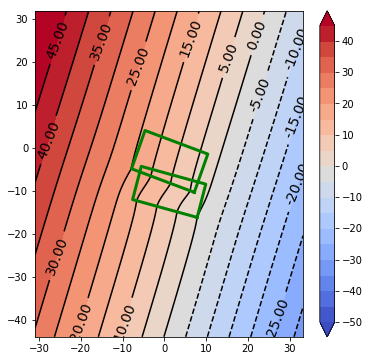

In [12]:
# Figure 6D
fig = plt.figure(figsize=(6,6))
CS = plt.contourf(x, y, dists['U'], 
                  cmap = plt.cm.coolwarm,
                  levels = np.arange(-50, 50, 5),
                  extend = "both")
CS2 = plt.contour(CS, colors = 'k')
plt.clabel(CS2, fmt='%2.2f', colors='k', fontsize=14)
plt.plot(rupx, rupy, color = 'g', linewidth = 3)
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(y), np.max(y)])
cbar = plt.colorbar(CS)

In [13]:
# El Mayor-Cucapah
# approximate offsets... so this figure isn't going to be exact. 
# This is a good example to check for discordancy handling. 
q0x = 2
q0y = -13
q1x = 0
q1y = 0
q2x = 0
q2y = 0
q3x = -37.9008
q3y = 34.1258
x0 = np.array([0.000+q0x, 0.000+q1x, 0.0000+q2x, 0.0000+q3x])
y0 = np.array([0.000+q0y, 0.000+q1y, 0.0000+q2y, 0.0000+q3y])
z0 = np.array([0.5, 0.5700, 0.5100, 0.6100])
x1 = np.array([-1.5696+q0x, -37.9008+q1x, 49.8112+q2x, -3.8038+q3x])
y1 = np.array([17.9312+q0y, 34.1258+q1y, -43.3000+q2y, 8.1573+q3y])
z1 = np.array([0.5000, 0.5700, 0.5100, 0.6100])
x2 = np.array([6.8881+q0x, -35.8228+q1x, 43.9061+q2x, -0.3056+q3x])
y2 = np.array([18.6715+q0y, 36.4337+q1y, -50.0931+q2y, 9.7885+q3y])
z2 = np.array([8.9900, 12.1600, 16.1000, 5.2100])
x3 = np.array([8.4577+q0x, 2.0780+q1x, -5.9051+q2x, 3.4982+q3x])
y3 = np.array([0.7403+q0y, 2.3079+q1y, -6.7931+q2y, 1.6313+q3y])
z3 = np.array([8.9900, 12.1600, 16.1000, 5.2100])

epilat = 32.15270
epilon = -115.30500
proj = geo.utils.get_orthographic_projection(epilon-1, epilon+1, epilat+1, epilat-1)
lon0,lat0 = proj(x0, y0, reverse = True)
lon1,lat1 = proj(x1, y1, reverse = True)
lon2,lat2 = proj(x2, y2, reverse = True)
lon3,lat3 = proj(x3, y3, reverse = True)

# Make an origin object; most of the 'event' values don't matter
event = {'lat': 0,  'lon': 0, 'depth':0, 'mag': 7.2, 
         'id':'', 'locstring':'', 'type':'ALL', 'eventsourcecode':''}
origin = Origin(event)
rup = QuadRupture.fromVertices(
    lon0, lat0, z0, lon1, lat1, z1, lon2, lat2, z2, lon3, lat3, z3,
    origin,
    group_index = [0, 1, 2, 3])

In [14]:
# Grid of sites
buf = 0.25
lat = np.linspace(np.nanmin(rup.lats)-buf, np.nanmax(rup.lats)+buf, 350)
lon = np.linspace(np.nanmin(rup.lons)-buf, np.nanmax(rup.lons)+buf, 350)
lons, lats = np.meshgrid(lon, lat)
dep = np.zeros_like(lons)
x,y = proj(lon, lat)
rupx,rupy = proj(rup.lons, rup.lats)

/Users/emthompson/miniconda/envs/shakemap/lib/python3.5/site-packages/openquake/hazardlib/geo/utils.py:221: RuntimeWarning: invalid value encountered in greater
  if (sin_dist > self.sin_pi_over_4).any():


In [15]:
# Calculate U and T
dtypes = ['U', 'T']
dists = get_distance(dtypes, lats, lons, dep, rup)

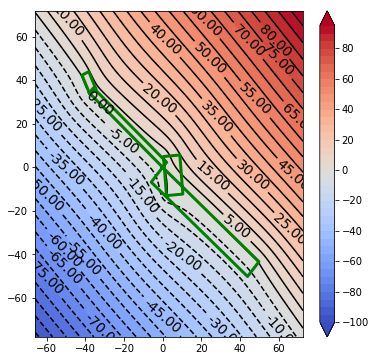

In [16]:
# Figure 8A
fig = plt.figure(figsize=(6,6))
CS = plt.contourf(x, y, dists['T'], 
                  cmap = plt.cm.coolwarm,
                  levels = np.arange(-100, 100, 5),
                  extend = "both")
CS2 = plt.contour(CS, colors = 'k')
plt.clabel(CS2, fmt='%2.2f', colors='k', fontsize=14)
plt.plot(rupx, rupy, color = 'g', linewidth = 3)
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(y), np.max(y)])
cbar = plt.colorbar(CS)

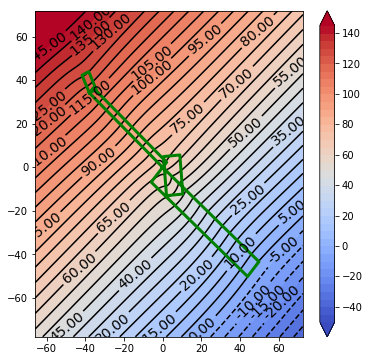

In [17]:
# Figure 8C
fig = plt.figure(figsize=(6,6))
CS = plt.contourf(x, y, dists['U'], 
                  cmap = plt.cm.coolwarm,
                  levels = np.arange(-50, 150, 5),
                  extend = "both")
CS2 = plt.contour(CS, colors = 'k')
plt.clabel(CS2, fmt='%2.2f', colors='k', fontsize=14)
plt.plot(rupx, rupy, color = 'g', linewidth = 3)
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(y), np.max(y)])
cbar = plt.colorbar(CS)

In [18]:
# The one thing that isn't check above is discordancy for segments
# with multiple quads. For this, we need a synthetic example. 
x0 = np.array([0,   1, -1, 10,   9,  7])
y0 = np.array([0,  10, 20, 40,  35, 30])
z0 = np.array([0,   0,  0,  0,   0,  0])
x1 = np.array([1,  -1,  0,  9,   7,  6])
y1 = np.array([10, 20, 30, 35,  30, 25])
z1 = np.array([0,   0,  0,  0,   0,  0])
x2 = np.array([3,   1,  2,  7,   5,  4])
y2 = np.array([10, 20, 30, 35,  30, 25])
z2 = np.array([10, 10, 10, 10,  10, 10])
x3 = np.array([2,   3,  1,  8,   7,  5])
y3 = np.array([0,  10, 20, 40,  35, 30])
z3 = np.array([10, 10, 10, 10,  10, 10])


epilat = 32.15270
epilon = -115.30500
proj = geo.utils.get_orthographic_projection(epilon-1, epilon+1, epilat+1, epilat-1)
lon0,lat0 = proj(x0, y0, reverse = True)
lon1,lat1 = proj(x1, y1, reverse = True)
lon2,lat2 = proj(x2, y2, reverse = True)
lon3,lat3 = proj(x3, y3, reverse = True)

# Make an Origin object; most of the 'event' values don't matter
event = {'lat': 0,  'lon': 0, 'depth':0, 'mag': 7.2, 
         'id':'', 'locstring':'', 'type':'ALL', 'eventsourcecode':''}
origin = Origin(event)

rup = QuadRupture.fromVertices(
    lon0, lat0, z0, lon1, lat1, z1, lon2, lat2, z2, lon3, lat3, z3,
    origin,
    group_index = [0, 0, 0, 1, 1, 1])


In [19]:
# Grid of sites
buf = 0.25
lat = np.linspace(np.nanmin(rup.lats)-buf, np.nanmax(rup.lats)+buf, 350)
lon = np.linspace(np.nanmin(rup.lons)-buf, np.nanmax(rup.lons)+buf, 350)
lons, lats = np.meshgrid(lon, lat)
dep = np.zeros_like(lons)
x,y = proj(lon, lat)
rupx,rupy = proj(rup.lons, rup.lats)

/Users/emthompson/miniconda/envs/shakemap/lib/python3.5/site-packages/openquake/hazardlib/geo/utils.py:221: RuntimeWarning: invalid value encountered in greater
  if (sin_dist > self.sin_pi_over_4).any():


In [20]:
# Calculate U and T
dtypes = ['U', 'T']
dists = get_distance(dtypes, lats, lons, dep, rup)

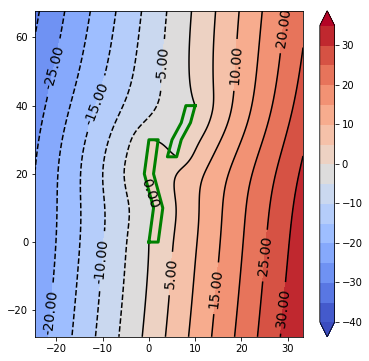

In [21]:
# T
fig = plt.figure(figsize=(6,6))
CS = plt.contourf(x, y, dists['T'], 
                  cmap = plt.cm.coolwarm,
                  levels = np.arange(-40, 40, 5),
                  extend = "both")
CS2 = plt.contour(CS, colors = 'k')
plt.clabel(CS2, fmt='%2.2f', colors='k', fontsize=14)
plt.plot(rupx, rupy, color = 'g', linewidth = 3)
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(y), np.max(y)])
cbar = plt.colorbar(CS)

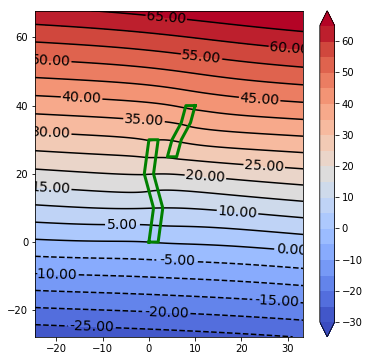

In [22]:
# U
fig = plt.figure(figsize=(6,6))
CS = plt.contourf(x, y, dists['U'], 
                  cmap = plt.cm.coolwarm,
                  levels = np.arange(-30, 70, 5),
                  extend = "both")
CS2 = plt.contour(CS, colors = 'k')
plt.clabel(CS2, fmt='%2.2f', colors='k', fontsize=14)
plt.plot(rupx, rupy, color = 'g', linewidth = 3)
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(y), np.max(y)])
cbar = plt.colorbar(CS)